In [1]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] =10000000000000000000000000.0
import cmocean

In [3]:
%pwd

'/work2/eay/MITgcm_data'

In [14]:
%cd /work/eay/MITgcm_data/Experiment26/
file0 = nc.Dataset('Temp.nc')
file1 = nc.Dataset('Salt.nc')
file2 = nc.Dataset('U.nc')
file3 = nc.Dataset('V.nc')
NX = 600
NY = 1000
NZ = 120

xq = (file1.variables['X'][:])
yq = (file1.variables['Y'][:])
zl = (file1.variables['Z'][:])
Time = file1.variables['T'][:]
print(Time.shape)

xqmat=np.tile(xq,(NY,1))
yqmat=np.tile(yq,(NX,1))
yqmat=np.transpose(yqmat)
print(yqmat.shape)
print(xqmat.shape)
%cd /work/eay/MITgcm_data/

/work2/eay/MITgcm_data/Experiment26
(150,)
(1000, 600)
(1000, 600)
/work2/eay/MITgcm_data


In [19]:

index = -1


#Plotting freshwater layer
mask = file1.variables['S'][0,0,:,:]
newmask = file1.variables['S'][0,:,:,:]

Salt = file1.variables['S'][index,:,:,:]; Salt[newmask==0]=np.nan
Sref = Salt*0.0+34.0
hf=0.1*np.nansum((Sref-Salt)/34.0,axis=0)
#hf[(mask==0)]=-10000000

hf[(mask==0)]=np.nan
hf_alongshore = np.nansum(hf*100,axis=0) #100m grid spacing
hf_alongshore.shape


(600,)

In [20]:
xq18 = xq;
hf18_alongshore = hf_alongshore
print('done')

done


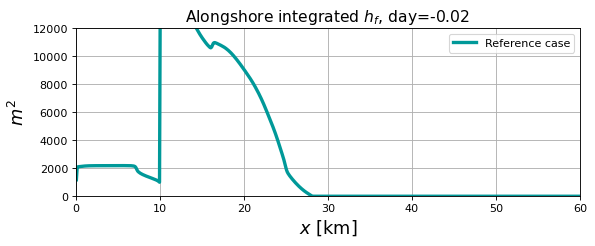

In [21]:

fig = plt.figure(figsize=(9, 3), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)


#ax1.plot(xq7/1000,hf7_alongshore,linewidth=3,color = 'k')
#ax1.plot(xq11/1000,hf11_alongshore,linewidth=3,color ='#ff5050')
#ax1.plot(xq17/1000,hf17_alongshore,linewidth=3,color='#ff9933')
ax1.plot(xq18/1000,hf18_alongshore,linewidth=3,color='#009999')
ax1.set_title('Alongshore integrated $h_f$, day=%04.2f ' %(index/48.), fontsize=14)
ax1.set_xlabel('$x$ [km]',fontsize=16)
ax1.set_ylabel('$m^2$',fontsize=16)
ax1.set_xlim([0,60]);ax1.set_ylim([0,12000])
ax1.legend(['Reference case','No wind','Subcritical inflow','Strong wind'])
plt.grid()


In [15]:
a = np.zeros((600,5)); a[:,:]=np.nan
a.shape

(600, 5)

In [16]:
a

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])